In [1]:
#including Libraries in the code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind

In [2]:
#loading Data from the CSV file
df = pd.read_csv("/kaggle/input/cricket/data.csv")

In [3]:
# Viewing Data from the Data Frame
df.head()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


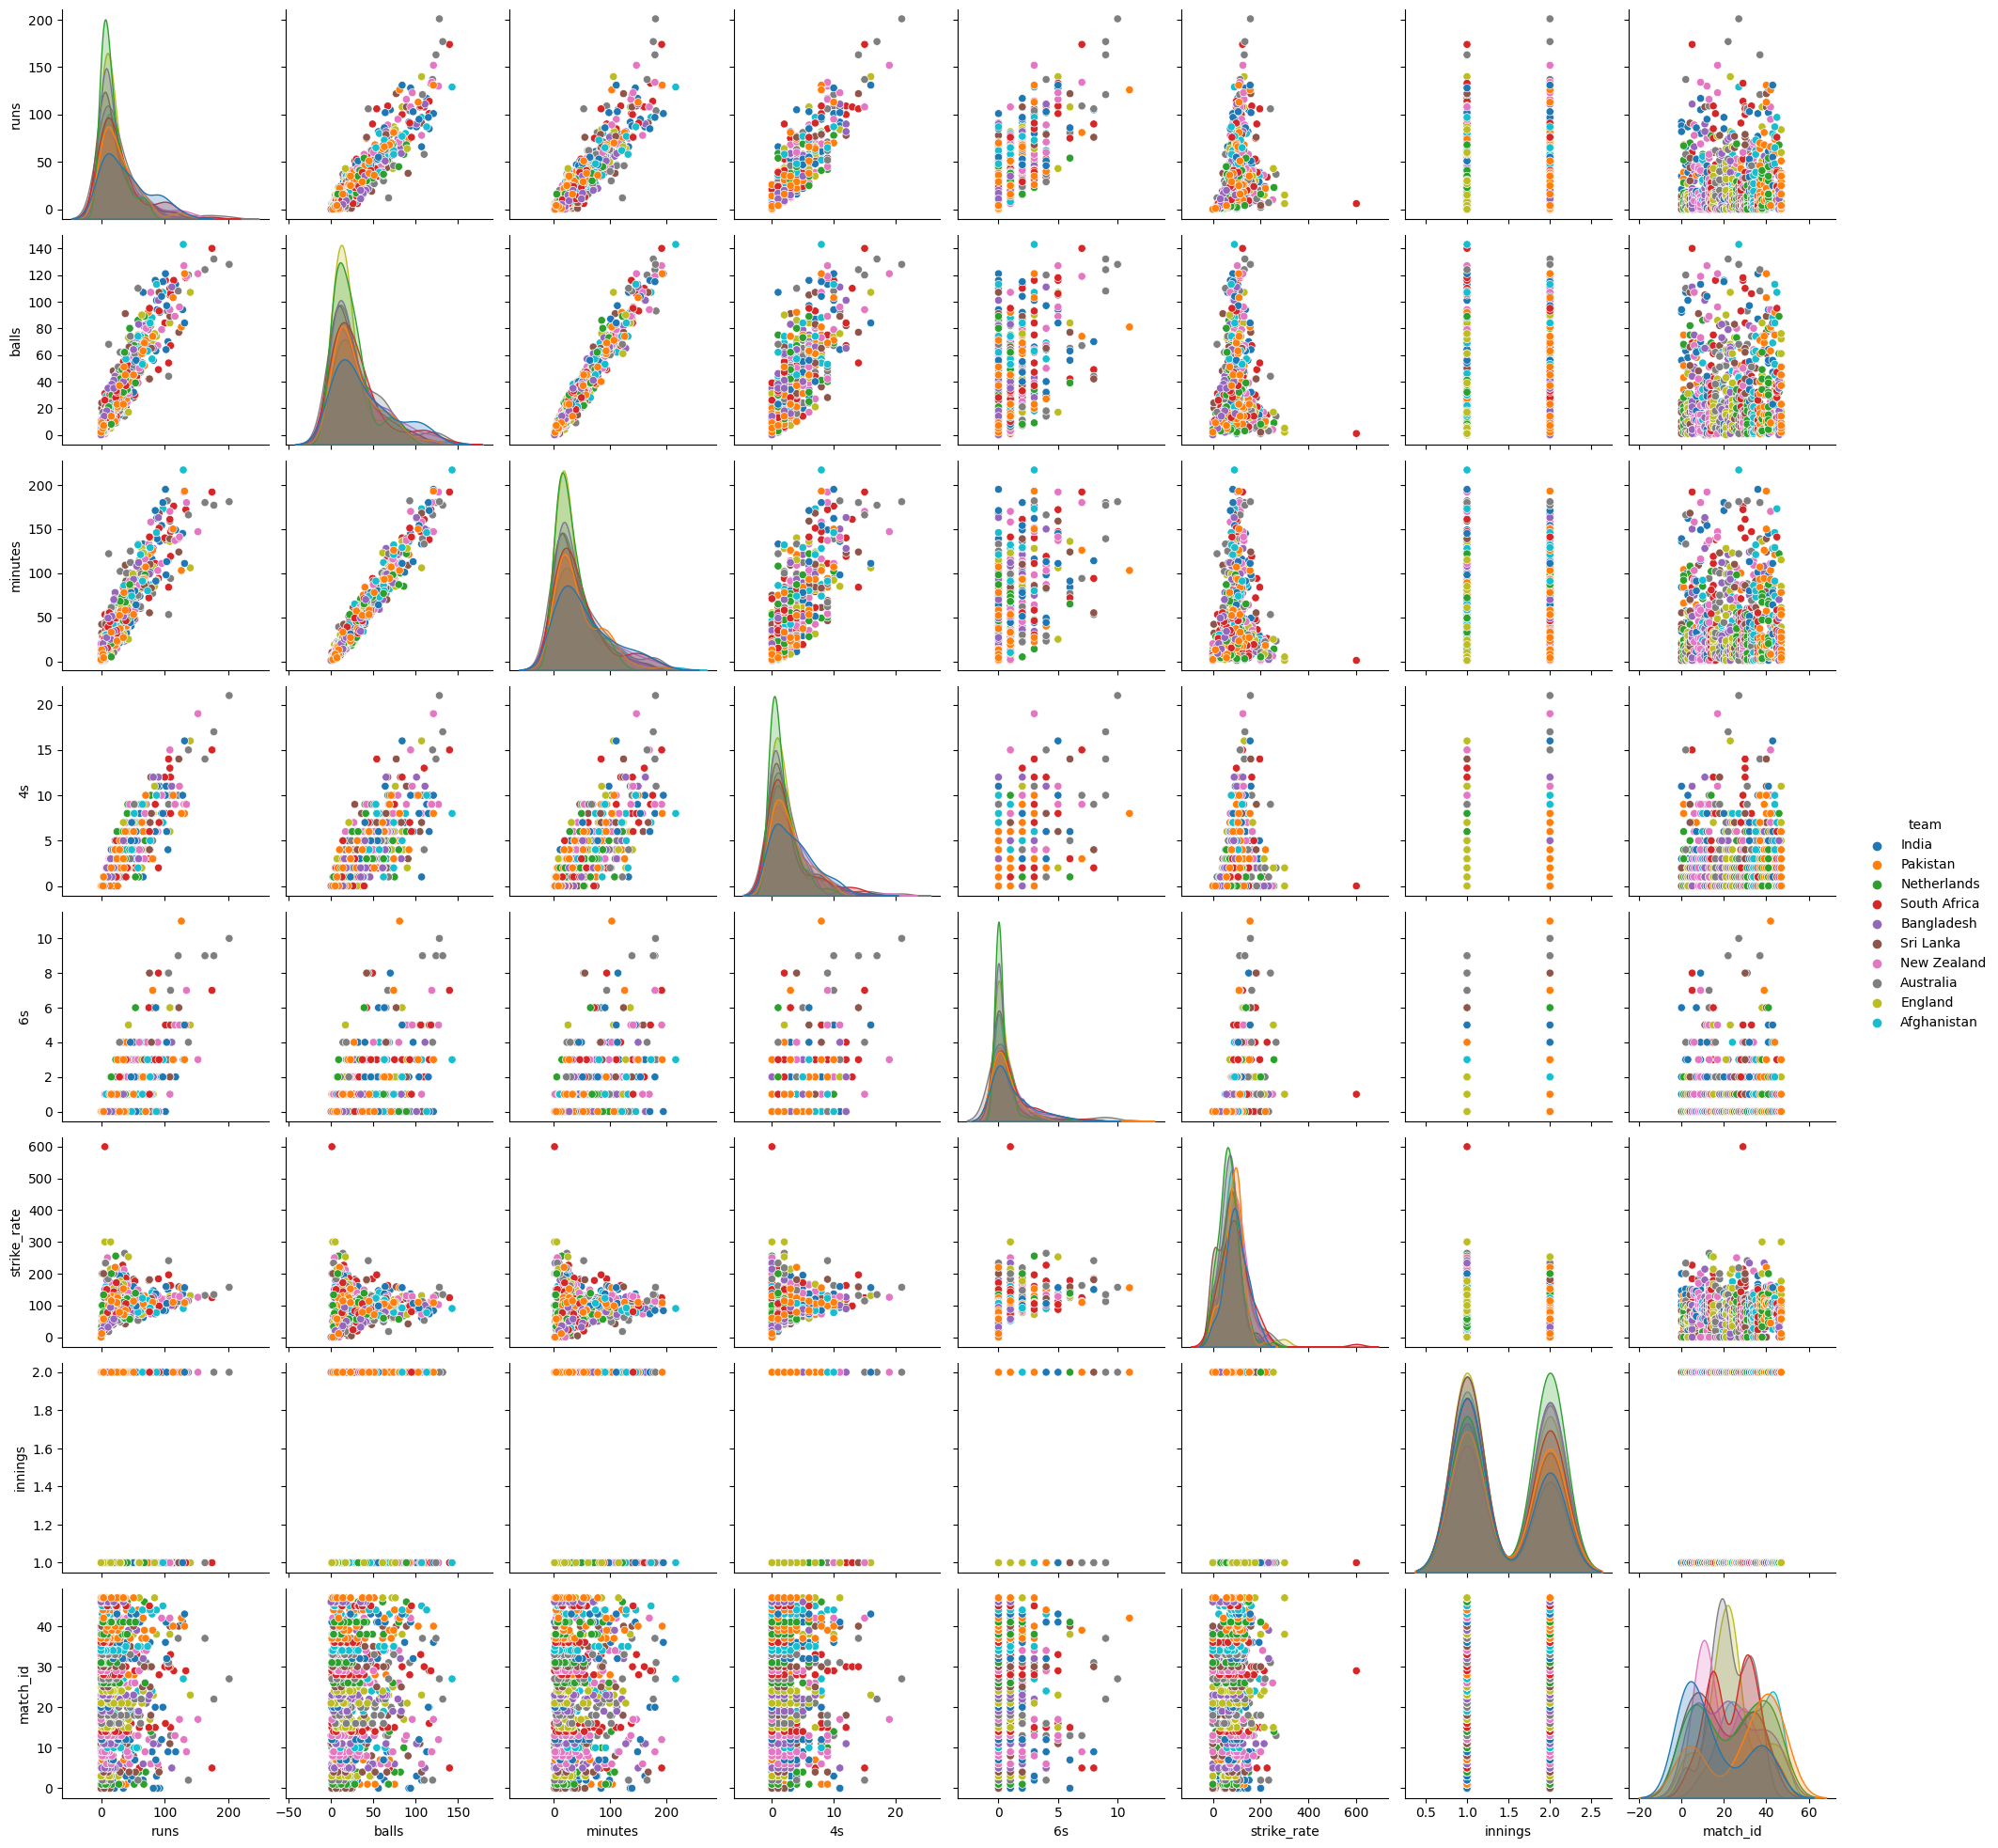

In [4]:
#plotting Data from the dataframe
sns.pairplot(df,hue='team')
plt.savefig('first_plot.png')
plt.show()

In [5]:
mx = df

In [6]:
#cleaning Data
# deleting the useless coloumns

del mx['match_id']
del mx['6s']
del mx['4s']
del mx['dismissal']
del mx['player']
del mx['innings']

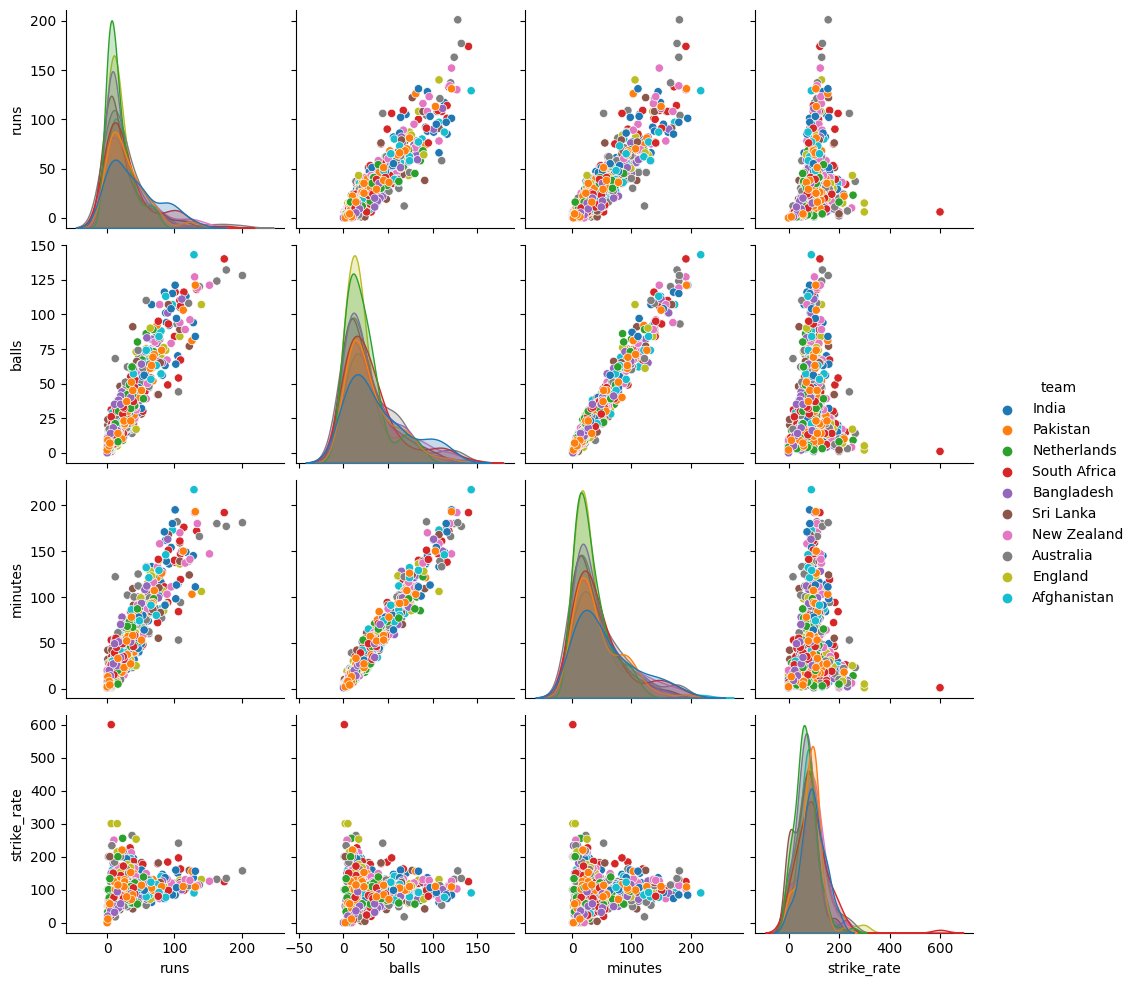

In [7]:
sns.pairplot(mx,hue='team')
plt.savefig("Second_plot.png")
plt.show()

In [ ]:
#deleting strike_rate
sns.scatterplot(x='balls',y='strike_rate',data=mx)
plt.savefig("third.png")
plt.show()

In [ ]:
# Data Cleaning
del mx['strike_rate']

In [ ]:
# Plotting Relevant Data
sns.pairplot(mx,hue="team")
plt.savefig("fourth.png")
plt.show()


In [ ]:
# Assuming 'runs' is the target variable
X = df[['balls', 'minutes']]  # Using 'balls' and 'minutes' as features for simplicity
y = df['runs']


In [ ]:
#cleaning data
# EDA
mx.describe()
mx


In [ ]:
# Assuming 'runs' is the target variable
X = df[['balls', 'minutes']]  # Using 'balls' and 'minutes' as features for simplicity
y = df['runs']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Forecast future values
new_balls_value=input("Enter Balls Value : ")
new_minutes_value=input("Enter minutes value")


In [ ]:
# Predicting Value
future_data = pd.DataFrame({'balls': [new_balls_value], 'minutes': [new_minutes_value]})
future_forecast = model.predict(future_data)

In [ ]:
# Visualize the results
plt.scatter(X_test['balls'], y_test, label='Actual')
plt.scatter(X_test['balls'], y_pred, label='Predicted')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [ ]:
# Forecast future values
print(f'Forecast for future data: {future_forecast[0]} runs')

In [ ]:
from scipy.stats import f_oneway
# Grouping
grouped_data = df.groupby('team')

# Aggregate statistics for each team
group_statistics = grouped_data[['runs', 'balls', 'minutes']].mean()

# Perform one-way ANOVA for comparing means of 'runs' between teams
teams_runs = [df[df['team'] == team]['runs'] for team in df['team'].unique()]
f_stat, p_value = f_oneway(*teams_runs)

# Visualization
plt.figure(figsize=(15,10))
sns.boxplot(x='team', y='runs', data=df)
plt.title('Runs Comparison between Teams')
plt.show()

# Print ANOVA results
print(f'One-way ANOVA F-statistic: {f_stat}')
print(f'P-value: {p_value}')

In [ ]:

teams = mx['team'].unique()
# A/B testing for all pairs of teams
alpha = 0.05

for i in range(len(teams)):
    for j in range(i + 1, len(teams)):
        team1 = teams[i]
        team2 = teams[j]

        team1_runs = df[df['team'] == team1]['runs']
        team2_runs = df[df['team'] == team2]['runs']

        t_stat, p_value = ttest_ind(team1_runs, team2_runs)

        print(f'A/B Testing between {team1} and {team2}:')
        print(f'T-statistic: {t_stat}')
        print(f'P-value: {p_value}')

        if p_value < alpha:
            print(f'Reject the null hypothesis: There is a significant difference between {team1} and {team2}.\n')
        else:
            print(f'Fail to reject the null hypothesis: There is no significant difference between {team1} and {team2}.\n')

In [ ]:
train = model.score(X_train, y_train)
print("Model Score : ",train)